In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df=pd.read_excel(r"C:\Users\adity\Sentiment Analysis\data\P597 DATASET.xlsx")
df

,title,rating,body
0,Horrible product,1,Very disappointed with the overall performance...
1,Camera quality is not like 48 megapixel,3,Camera quality is low
2,Overall,4,"Got the mobile on the launch date,Battery must..."
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp..."
...,...,...,...
1435,Excellent mobile,5,Excellent mobile
1436,Never expected from samsung,1,"All over mobile performance is very poor, neve..."
1437,Good value for money,5,Battery life is good but camera clarity could ...
1438,Unreal and whitish display,1,"It's a very bad product, highly dissatisfied....."


In [30]:
df.head()

,title,rating,body
0,Horrible product,1,Very disappointed with the overall performance...
1,Camera quality is not like 48 megapixel,3,Camera quality is low
2,Overall,4,"Got the mobile on the launch date,Battery must..."
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp..."


In [32]:
df.shape

(1440, 3)

In [34]:
df.columns

Index(['title', 'rating', 'body'], dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1440 non-null   object
 1   rating  1440 non-null   int64 
 2   body    1440 non-null   object
dtypes: int64(1), object(2)
memory usage: 33.9+ KB


In [38]:
df.describe()

,rating
count,1440.000000
mean,3.173611
std,1.584453
min,1.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


In [40]:
df.isnull().sum()

title     0
rating    0
body      0
dtype: int64

In [42]:
df['rating'].value_counts()

rating
5    419
1    386
4    310
3    199
2    126
Name: count, dtype: int64

In [44]:
print(df.dtypes)

title     object
rating     int64
body      object
dtype: object


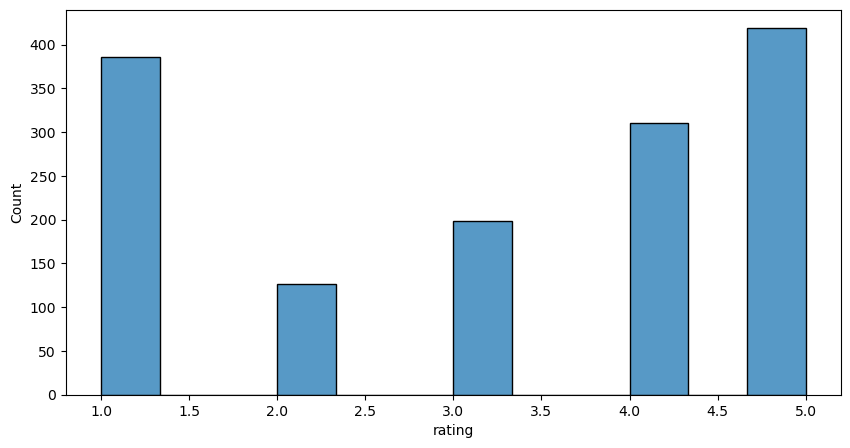

rating
5    419
1    386
4    310
3    199
2    126
Name: count, dtype: int64

In [46]:
plt.figure(figsize=(10,5))
sns.histplot(df['rating'])
plt.show()

df['rating'].value_counts()

In [48]:
!pip install deep_translator
import pandas as pd
from deep_translator import GoogleTranslator


df = pd.read_excel(r'C:\Users\adity\Sentiment Analysis\data\P597 DATASET.xlsx')

def translate_text(text):
    try:

        result = GoogleTranslator(source='auto', target='en').translate(text)
        return result
    except Exception as e:

        return text


df['title'] = df['title'].apply(translate_text)
df['body'] = df['body'].apply(translate_text)

In [50]:
df.head(20)

,title,rating,body
0,Horrible product,1,Very disappointed with the overall performance...
1,Camera quality is not like 48 megapixel,3,Camera quality is low
2,Overall,4,"Got the mobile on the launch date,Battery must..."
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp..."
5,Too much lagging and slow,1,I will never purchase Samsung phones. Phone is...
6,Worst samsung mobile ever,1,This is worst samsung mobile I have seen from ...
7,Not even 10% of how it is shown,1,"The camera of the mobile is not good at all, i..."
8,Slow performance,1,The phone hangs a lot and is very slow. I rece...
9,Don’t buy from Amazon.,1,Very poor quality camera .Found box seal damag...


In [52]:
df['title'][421]

'I did not like the samsung m12 6GB ram 128 GB rom 6000mH battery you bought from Amazon.'

In [54]:
!pip install nltk
!pip install emoji

import pandas as pd
import re
import string
import emoji
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

def preprocess_text(text):
    if not isinstance(text, str):
        text = str(text)

    text = text.lower()

    # Remove URLs
    text = re.sub(r'http[s]?://\S+|www\.\S+', '', text)

    # Remove @mentions and #hashtags
    text = re.sub(r'[@#]\w+', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove emojis
    text = emoji.replace_emoji(text, replace='')

    # Normalize whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 1]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

df['title'] = df['title'].apply(preprocess_text)
df['body'] = df['body'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [56]:
df.head(10)

,title,rating,body
0,horrible product,1,disappointed overall performance samsung
1,camera quality like megapixel,3,camera quality low
2,overall,4,got mobile launch datebattery must appreciated...
3,big,1,doesnt work ghz wifi frequency ghz old school ...
4,put money somewhere else,1,worth buyingfaulty software poor display quali...
5,much lagging slow,1,never purchase samsung phone phone lagging muc...
6,worst samsung mobile ever,1,worst samsung mobile seen samsung sceen qualit...
7,even shown,1,camera mobile good pm clarity even mega pixel ...
8,slow performance,1,phone hang lot slow received replacement conti...
9,buy amazon,1,poor quality camera found box seal damage stil...


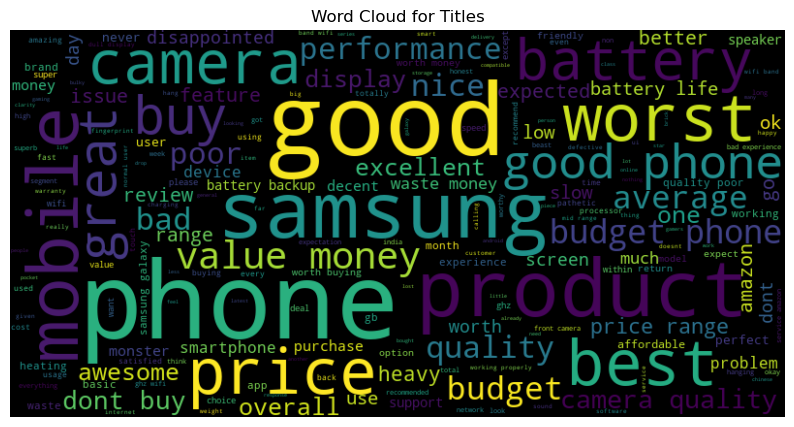

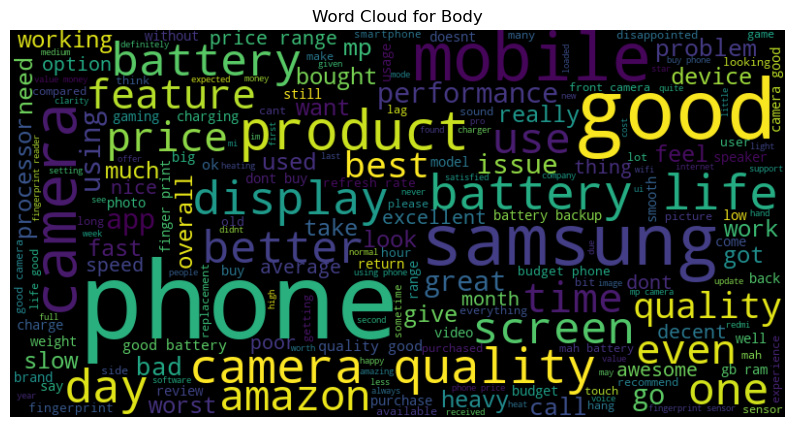

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text_column, title):
    """Generates and displays a word cloud for a given text column."""
    # Combine all text into a single string
    all_text = " ".join(text_column.dropna())

    # Create the word cloud object
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_text)

    # Display the word cloud
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word cloud for 'title'
generate_wordcloud(df['title'], 'Word Cloud for Titles')

# Generate word cloud for 'body'
generate_wordcloud(df['body'], 'Word Cloud for Body')

In [60]:
def get_sentiment_from_rating(rating):

    if rating in [4, 5]:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif rating in [1, 2]:
        return "Negative"
    else:
        return "Unknown"

In [62]:
df['sentiment'] = df['rating'].apply(get_sentiment_from_rating)
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)
df

sentiment
Positive    729
Negative    512
Neutral     199
Name: count, dtype: int64


,title,rating,body,sentiment
0,horrible product,1,disappointed overall performance samsung,Negative
1,camera quality like megapixel,3,camera quality low,Neutral
2,overall,4,got mobile launch datebattery must appreciated...,Positive
3,big,1,doesnt work ghz wifi frequency ghz old school ...,Negative
4,put money somewhere else,1,worth buyingfaulty software poor display quali...,Negative
...,...,...,...,...
1435,excellent mobile,5,excellent mobile,Positive
1436,never expected samsung,1,mobile performance poor never buy one product ...,Negative
1437,good value money,5,battery life good camera clarity could little ...,Positive
1438,unreal whitish display,1,bad product highly dissatisfied specifically c...,Negative


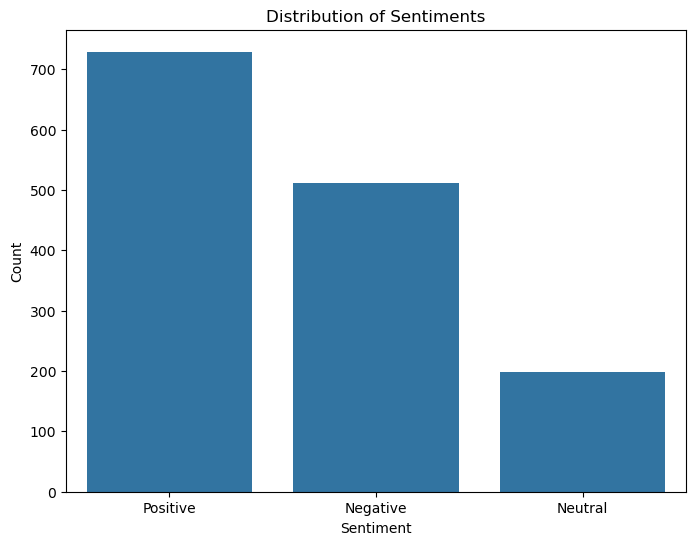

In [64]:
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [66]:
from sklearn.model_selection import train_test_split
X = df[['title', 'body']] # Select only 'title' and 'body' as features
y = df['sentiment'] # Keep 'sentiment' as the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets:")
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Data split into training and testing sets:
Training features shape: (1152, 2)
Testing features shape: (288, 2)
Training target shape: (1152,)
Testing target shape: (288,)


In [68]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import hstack
import pandas as pd
import numpy as np

# ==================================================================
# STEP 1: Combine title and body for vocabulary building
# ==================================================================
X_train_combined = X_train['title'].fillna('') + " " + X_train['body'].fillna('')
X_test_combined  = X_test['title'].fillna('')  + " " + X_test['body'].fillna('')

# ==================================================================
# STEP 2: Build shared vocabulary (TRAIN ONLY)
# ==================================================================
vocab_vectorizer = TfidfVectorizer(
    max_features=8000,
    stop_words='english',
    lowercase=True,
    ngram_range=(1, 2)
)
vocab_vectorizer.fit(X_train_combined)
print(f"Vocabulary size: {len(vocab_vectorizer.vocabulary_)}")

# ==================================================================
# STEP 3: Create vectorizers with shared vocab
# ==================================================================
bow_vectorizer  = CountVectorizer(vocabulary=vocab_vectorizer.vocabulary_)
tfidf_vectorizer = TfidfVectorizer(vocabulary=vocab_vectorizer.vocabulary_, norm='l2')

# ==================================================================
# STEP 4: Transform title (BoW) and body (TF-IDF)
# ==================================================================
print("Vectorizing title and body...")

X_train_title_bow = bow_vectorizer.fit_transform(X_train['title'].fillna(''))
X_test_title_bow  = bow_vectorizer.transform(X_test['title'].fillna(''))

X_train_body_tfidf = tfidf_vectorizer.fit_transform(X_train['body'].fillna(''))
X_test_body_tfidf  = tfidf_vectorizer.transform(X_test['body'].fillna(''))

# ==================================================================
# STEP 5: Stack ALL features: title + body (Removed rating)
# ==================================================================
X_train_final = hstack([X_train_title_bow, X_train_body_tfidf])
X_test_final  = hstack([X_test_title_bow,  X_test_body_tfidf])

# ==================================================================
# FINAL CHECK
# ==================================================================
print("Text features representation completed.")
print(f"Final training shape: {X_train_final.shape}")
print(f"Final testing shape:  {X_test_final.shape}")

Vocabulary size: 8000
Vectorizing title and body...
Text features representation completed.
Final training shape: (1152, 16000)
Final testing shape:  (288, 16000)


In [70]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import xgboost as xgb
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

# Create a ColumnTransformer to apply different transformations to different columns
# We apply CountVectorizer to 'title' and TfidfVectorizer to 'body'
preprocessor = ColumnTransformer(
    transformers=[
        ('title_bow', CountVectorizer(vocabulary=vocab_vectorizer.vocabulary_), 'title'),
        ('body_tfidf', TfidfVectorizer(vocabulary=vocab_vectorizer.vocabulary_), 'body')
    ],
    remainder='passthrough' # Keep other columns (although there are none in this case)
)

# Create the pipeline with XGBoostClassifier
print("Creating pipeline with XGBoostClassifier...")
pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42))])

# Train the pipeline
print("Training pipeline...")

# LightGBM and XGBoost expect integer-encoded labels for multi-class classification within the pipeline
# Map sentiment labels to numerical values
sentiment_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
y_train_encoded = y_train.map(sentiment_mapping)
y_test_encoded = y_test.map(sentiment_mapping)

pipeline_xgb.fit(X_train, y_train_encoded) # Use the encoded target variable
print("Pipeline training complete.")

# Make predictions on the test set
y_pred_pipeline_xgb = pipeline_xgb.predict(X_test)

# Evaluate the pipeline
accuracy_pipeline_xgb = accuracy_score(y_test_encoded, y_pred_pipeline_xgb) # Evaluate against encoded test labels
report_pipeline_xgb = classification_report(y_test_encoded, y_pred_pipeline_xgb)

print("🔹 Pipeline Results (XGBoost)")
print("Accuracy:", accuracy_pipeline_xgb)
print("\nClassification Report:\n", report_pipeline_xgb)

Creating pipeline with XGBoostClassifier...
Training pipeline...
Pipeline training complete.
🔹 Pipeline Results (XGBoost)
Accuracy: 0.7569444444444444

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83       111
           1       0.29      0.09      0.14        44
           2       0.75      0.92      0.83       133

    accuracy                           0.76       288
   macro avg       0.62      0.61      0.60       288
weighted avg       0.71      0.76      0.72       288



In [72]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import xgboost as xgb
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Create a ColumnTransformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('title_bow', CountVectorizer(vocabulary=vocab_vectorizer.vocabulary_), 'title'),
        ('body_tfidf', TfidfVectorizer(vocabulary=vocab_vectorizer.vocabulary_), 'body')
    ],
    remainder='passthrough'
)

# Create the pipeline with XGBoostClassifier
pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42))])

# Define a reduced parameter grid for RandomizedSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__max_depth': [3, 5],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0]
}

# Map sentiment labels to numerical values
sentiment_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
y_train_encoded = y_train.map(sentiment_mapping)

# Use RandomizedSearchCV with a limited number of iterations (n_iter) to control time
print("Performing RandomizedSearchCV for XGBoost...")
random_search = RandomizedSearchCV(pipeline_xgb, param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train_encoded)

print("\nBest parameters found:")
print(random_search.best_params_)

print("\nBest cross-validation accuracy:")
print(random_search.best_score_)

# Evaluate the best model on the test set
best_xgb_model = random_search.best_estimator_
y_pred_tuned_xgb = best_xgb_model.predict(X_test)

# Evaluate against encoded test labels
y_test_encoded = y_test.map(sentiment_mapping)
accuracy_tuned_xgb = accuracy_score(y_test_encoded, y_pred_tuned_xgb)
report_tuned_xgb = classification_report(y_test_encoded, y_pred_tuned_xgb)

print("\n🔹 Tuned XGBoost Pipeline Results")
print("Accuracy:", accuracy_tuned_xgb)
print("\nClassification Report:\n", report_tuned_xgb)

Performing RandomizedSearchCV for XGBoost...

Best parameters found:
{'classifier__subsample': 1.0, 'classifier__n_estimators': 100, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.1, 'classifier__colsample_bytree': 0.8}

Best cross-validation accuracy:
0.745638998682477

🔹 Tuned XGBoost Pipeline Results
Accuracy: 0.7569444444444444

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       111
           1       0.50      0.07      0.12        44
           2       0.73      0.91      0.81       133

    accuracy                           0.76       288
   macro avg       0.68      0.61      0.59       288
weighted avg       0.73      0.76      0.71       288



In [76]:
# Compare actual and predicted values for XGBoost
print("Actual vs. Predicted Sentiment (Tuned XGBoost Pipeline - first 20):")
# We need to map the encoded predictions back to sentiment labels for better readability
sentiment_mapping = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
reverse_sentiment_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}

# Get the actual encoded values and predicted encoded values
actual_encoded_values = y_test.map(reverse_sentiment_mapping)
predicted_encoded_values = y_pred_tuned_xgb

# Iterate and print, mapping back to labels for readability
for actual_encoded, predicted_encoded in zip(actual_encoded_values[:20], predicted_encoded_values[:20]):
     # Check if actual_encoded is not NaN before mapping to string
     actual_label = sentiment_mapping.get(actual_encoded, 'Unknown') # Use .get to handle potential NaNs gracefully
     predicted_label = sentiment_mapping.get(predicted_encoded, 'Unknown')

     print(f"Actual: {actual_label}, Predicted: {predicted_label}")

Actual vs. Predicted Sentiment (Tuned XGBoost Pipeline - first 20):
Actual: Positive, Predicted: Positive
Actual: Neutral, Predicted: Negative
Actual: Positive, Predicted: Positive
Actual: Negative, Predicted: Negative
Actual: Negative, Predicted: Negative
Actual: Positive, Predicted: Positive
Actual: Negative, Predicted: Negative
Actual: Positive, Predicted: Negative
Actual: Neutral, Predicted: Positive
Actual: Positive, Predicted: Positive
Actual: Positive, Predicted: Positive
Actual: Positive, Predicted: Negative
Actual: Positive, Predicted: Positive
Actual: Negative, Predicted: Negative
Actual: Positive, Predicted: Positive
Actual: Negative, Predicted: Negative
Actual: Negative, Predicted: Negative
Actual: Negative, Predicted: Negative
Actual: Positive, Predicted: Positive
Actual: Negative, Predicted: Positive


In [78]:
import joblib
import os

# Assuming Logistic Regression is the chosen model for deployment based on current evaluation
# If you prefer a different model (e.g., the tuned XGBoost pipeline), please let me know.
best_model = best_xgb_model # Or pipeline_xgb, or best_xgb_model, etc.

# Define the filename for the saved model
model_filename = 'sentiment_model.joblib'

# Save the model to a file
try:
    joblib.dump(best_model, model_filename)
    print(f"Model successfully saved to {model_filename}")

    # You can verify the file exists
    if os.path.exists(model_filename):
        print(f"File {model_filename} created successfully.")
except Exception as e:
    print(f"Error saving the model: {e}")

# --- Evaluation for Deployment ---
# Evaluating for deployment typically involves:
# 1. Loading the saved model.
# 2. Preprocessing new, unseen data in the same way as the training data.
# 3. Using the loaded model to make predictions on the new data.
# 4. Analyzing the predictions and potentially evaluating performance if ground truth is available.

print("\nTo evaluate the saved model for deployment:")
print(f"1. Load the model using: loaded_model = joblib.load('{model_filename}')")
print("2. Preprocess your new data using the same steps (translation, cleaning, vectorization).")
print("3. Make predictions on the preprocessed new data using: loaded_model.predict(new_data_features)")
print("4. Analyze the predictions.")

Model successfully saved to sentiment_model.joblib
File sentiment_model.joblib created successfully.

To evaluate the saved model for deployment:
1. Load the model using: loaded_model = joblib.load('sentiment_model.joblib')
2. Preprocess your new data using the same steps (translation, cleaning, vectorization).
3. Make predictions on the preprocessed new data using: loaded_model.predict(new_data_features)
4. Analyze the predictions.


In [80]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_final, y_train)
y_pred_log = log_model.predict(X_test_final)

print("🔹 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

🔹 Logistic Regression Results
Accuracy: 0.7777777777777778

Classification Report:
               precision    recall  f1-score   support

    Negative       0.85      0.85      0.85       111
     Neutral       0.60      0.14      0.22        44
    Positive       0.74      0.93      0.82       133

    accuracy                           0.78       288
   macro avg       0.73      0.64      0.63       288
weighted avg       0.76      0.78      0.74       288



In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Random Forest model
print("Training Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=300,random_state=42)
rf_model.fit(X_train_final, y_train)
print("Random Forest model training complete.")

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_final)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("🔹 Random Forest Results")
print("Accuracy:", accuracy_rf)
print("\nClassification Report:\n", report_rf)

Training Random Forest model...
Random Forest model training complete.
🔹 Random Forest Results
Accuracy: 0.7604166666666666

Classification Report:
               precision    recall  f1-score   support

    Negative       0.92      0.80      0.86       111
     Neutral       0.00      0.00      0.00        44
    Positive       0.68      0.98      0.80       133

    accuracy                           0.76       288
   macro avg       0.53      0.59      0.55       288
weighted avg       0.67      0.76      0.70       288



In [84]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

X_train_text_features = hstack([X_train_title_bow, X_train_body_tfidf])
X_test_text_features = hstack([X_test_title_bow, X_test_body_tfidf])


nb_model = MultinomialNB()
# Fit the model using only the text features
nb_model.fit(X_train_text_features, y_train)
y_pred_nb = nb_model.predict(X_test_text_features)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

print("🔹 Naive Bayes Results")
print("Accuracy:", accuracy_nb)
print("\nClassification Report:\n", report_nb)

🔹 Naive Bayes Results
Accuracy: 0.7534722222222222

Classification Report:
               precision    recall  f1-score   support

    Negative       0.93      0.78      0.85       111
     Neutral       0.00      0.00      0.00        44
    Positive       0.67      0.98      0.80       133

    accuracy                           0.75       288
   macro avg       0.53      0.59      0.55       288
weighted avg       0.67      0.75      0.69       288



In [86]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report
import numpy as np # Import numpy for label encoding

# Train LightGBM model
print("Training LightGBM model...")

# LightGBM also expects integer-encoded labels for multi-class classification
# Map sentiment labels to numerical values
sentiment_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
y_train_encoded = y_train.map(sentiment_mapping)
y_test_encoded = y_test.map(sentiment_mapping)

# Ensure there are no NaNs in the encoded labels if any sentiment was not mapped
if y_train_encoded.isnull().any() or y_test_encoded.isnull().any():
    print("Warning: Some sentiment labels were not mapped correctly.")


lgb_model = lgb.LGBMClassifier(objective='multiclass', num_class=len(sentiment_mapping), random_state=42)
lgb_model.fit(X_train_final, y_train_encoded) # Use the encoded target variable
print("LightGBM model training complete.")

# Make predictions on the test set
y_pred_lgb = lgb_model.predict(X_test_final)

# Evaluate the model
accuracy_lgb = accuracy_score(y_test_encoded, y_pred_lgb) # Evaluate against encoded test labels
report_lgb = classification_report(y_test_encoded, y_pred_lgb)

print(f"LightGBM Model Accuracy on Test Set: {accuracy_lgb:.4f}")
print("\nLightGBM Model Classification Report:")
print(report_lgb)

Training LightGBM model...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5187
[LightGBM] [Info] Number of data points in the train set: 1152, number of used features: 248
[LightGBM] [Info] Start training from score -1.055293
[LightGBM] [Info] Start training from score -2.005830
[LightGBM] [Info] Start training from score -0.659014
LightGBM model training complete.
LightGBM Model Accuracy on Test Set: 0.7396

LightGBM Model Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       111
           1       0.29      0.14      0.18        44
           2       0.74      0.86      0.79       133

    accuracy                           0.74       288
   macro avg       0.62      0.61      0.60       288
weighted avg   

In [88]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Train XGBoost model
print("Training XGBoost model...")

# Adjust target variable to be zero-indexed for XGBoost
# Map sentiment labels to numerical values starting from 0
sentiment_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
y_train_encoded = y_train.map(sentiment_mapping)
y_test_encoded = y_test.map(sentiment_mapping)

# No need to subtract 1 anymore, as the mapping already provides 0, 1, 2

xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

xgb_model.fit(X_train_final, y_train_encoded) # Use the correctly encoded target variable
print("XGBoost model training complete.")

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_final)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb) # Evaluate against correctly encoded test labels
report_xgb = classification_report(y_test_encoded, y_pred_xgb)

print(f"XGBoost Model Accuracy on Test Set: {accuracy_xgb:.4f}")
print("\nXGBoost Model Classification Report:")
print(report_xgb)

Training XGBoost model...
XGBoost model training complete.
XGBoost Model Accuracy on Test Set: 0.7569

XGBoost Model Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       111
           1       0.29      0.09      0.14        44
           2       0.75      0.92      0.83       133

    accuracy                           0.76       288
   macro avg       0.62      0.61      0.60       288
weighted avg       0.71      0.76      0.72       288



In [90]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

# Create a ColumnTransformer to apply different transformations to different columns
# We apply CountVectorizer to 'title' and TfidfVectorizer to 'body'
preprocessor = ColumnTransformer(
    transformers=[
        ('title_bow', CountVectorizer(vocabulary=vocab_vectorizer.vocabulary_), 'title'),
        ('body_tfidf', TfidfVectorizer(vocabulary=vocab_vectorizer.vocabulary_), 'body')
    ],
    remainder='passthrough' # Keep other columns (although there are none in this case)
)

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(random_state=42))])

# Train the pipeline
print("Training pipeline...")
pipeline.fit(X_train, y_train)
print("Pipeline training complete.")

# Make predictions on the test set
y_pred_pipeline = pipeline.predict(X_test)

# Evaluate the pipeline
accuracy_pipeline = accuracy_score(y_test, y_pred_pipeline)
report_pipeline = classification_report(y_test, y_pred_pipeline)

print("🔹 Pipeline Results (Logistic Regression)")
print("Accuracy:", accuracy_pipeline)
print("\nClassification Report:\n", report_pipeline)

Training pipeline...
Pipeline training complete.
🔹 Pipeline Results (Logistic Regression)
Accuracy: 0.7777777777777778

Classification Report:
               precision    recall  f1-score   support

    Negative       0.85      0.85      0.85       111
     Neutral       0.60      0.14      0.22        44
    Positive       0.74      0.93      0.82       133

    accuracy                           0.78       288
   macro avg       0.73      0.64      0.63       288
weighted avg       0.76      0.78      0.74       288



In [92]:
import pickle
pickle.dump(best_xgb_model, open('sentiment_model.pkl', 'wb'))